# EO data analysis

In [236]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [237]:
import numpy as np
from eolearn.core import EOPatch
import matplotlib.pyplot as plt

In [238]:
DATA_PATH = Path(r'E:\Data\PerceptiveSentinel\SVN\2017\processed\patches')

## Class frequency

In [269]:
class_type = 'LULC_2020_G'
class_types = {
    'LULC_2017': 'LULC',
    'LULC_2020': 'LULC',
    'LULC_2017_G': 'LULC_GROUPED',
    'LULC_2020_G': 'LULC_GROUPED',
}
class_names = {
    'LULC': [
        "No Data",                                       #
        "Arable land",                                   # 1100
        "Hop field",                                     # 1160
        "Permanent crops on arable land",                # 1180
        "Greenhouse",                                    # 1190
        "Vineyard",                                      # 1211
        "Nursery",                                       # 1212
        "Intensive orchard",                             # 1221
        "Extensive orchard",                             # 1222
        "Olive grove",                                   # 1230
        "Other permanent crop",                          # 1240
        "Permanent grassland",                           # 1300
        "Swampy meadow",                                 # 1321
        "Overgrown agricultural area",                   # 1410
        "Forest plantation",                             # 1420
        "Trees and shrubs",                              # 1500
        "Uncultivated agricultural land",                # 1600
        "Forest trees on agricultural land",             # 1800
        "Forest",                                        # 2000
        "Built-up area and related surface",             # 3000
        "Swamp",                                         # 4100
        "Reed",                                          # 4210
        "Other marshy area",                             # 4220
        "Dried open area with special vegetation",       # 5000
        "Open area with little or no vegetation",        # 6000
        "Water",                                         # 7000
    ],
    'LULC_GROUPED': [
        'No Data',                  # 1600
        'Cultivated Land',          # 1100, 1160, 1180, 1190, 1211, 1212, 1221, 1222, 1230, 1240
        'Forest',                   # 1420, 2000
        'Grassland',                # 1300, 1321, 1800
        'Shrubland',                # 1410, 1500, 5000
        'Water',                    # 7000
        'Wetlands',                 # 4100, 4210, 4220
        'Tundra',                   #
        'Artificial Surface',       # 3000
        'Bareland',                 # 6000
        'Snow and Ice',             #
    ]
}
classes = class_names[class_types[class_type]]

In [270]:
classes_len = len(classes)
class_freq = np.zeros(classes_len)

print('Counting classes...')
for patch_path in DATA_PATH.iterdir():
    match = re.match(r'^eopatch_(\d+)$', patch_path.name)

    # Check if directory name matches pattern.
    if not match or not patch_path.is_dir():
        print(f'Skipping: {patch_path.name}')
        continue

    # Get directory index.
    idx = int(match.group(1))
    # indices.append(idx)

    # print(f'Loading eopach_{idx}')
    eopatch = EOPatch.load(str(patch_path), lazy_loading=True)
    class_freq += np.bincount(eopatch.mask_timeless[class_type].ravel(), minlength=classes_len)
    del eopatch

print(f'Finished: {class_freq}')

Counting classes...
Finished: [7.11253260e+07 1.78915920e+07 1.87197000e+05 3.48230000e+04
 1.83180000e+04 1.79364700e+06 4.51700000e+03 4.35524000e+05
 2.80774600e+06 2.39306000e+05 4.53120000e+04 3.47108180e+07
 5.57847000e+05 2.48177400e+06 2.60690000e+04 3.50639000e+06
 1.44687100e+06 1.07731400e+06 1.19619751e+08 1.13310580e+07
 4.36000000e+03 7.82800000e+03 1.19122000e+05 1.80680700e+06
 1.25044400e+06 1.43273900e+06]


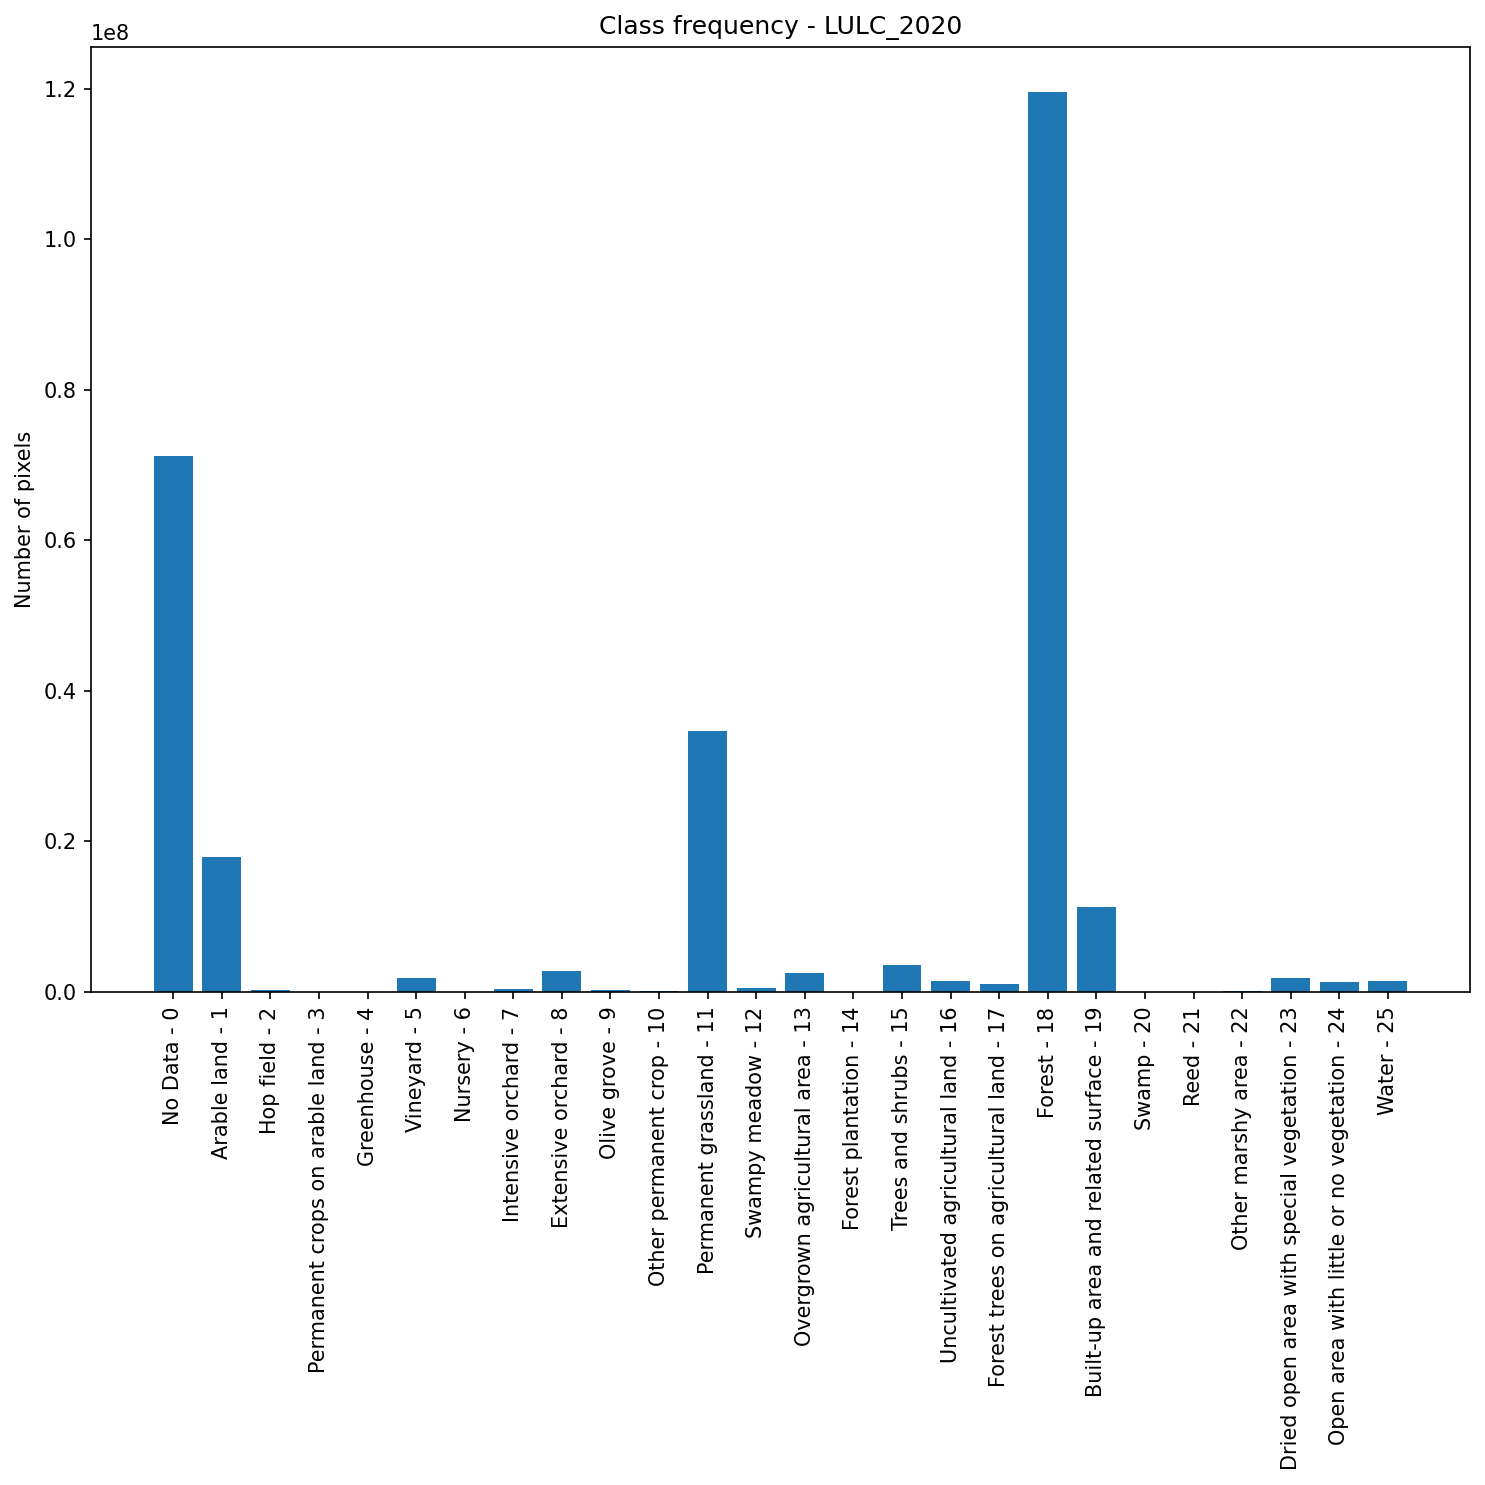

In [271]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=150)
ax.bar(classes, class_freq)
# ax.set_yscale('log')
ax.set_title(f'Class frequency - {class_type}')
ax.set_ylabel('Number of pixels')
ax.set_xticklabels([f'{c} - {i}' for i, c in enumerate(classes)], rotation=90)
# plt.show()
plt.tight_layout()
plt.savefig(f'./figures/class_freq_{class_type}.png')
plt.savefig(f'./figures/class_freq_{class_type}.svg')